## I will give you massPy as a zip - you will have to unzip and `pip install -e massPy`

In [50]:
import sys, os
sys.path.append('python\\plot')
print(os.getcwd())
from animation import animate
import massPy as mp
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Simon Andersen\Projects\Projects\Thesis\NematicSimulation\plot


In [51]:
def get_dir(Qxx, Qyx, return_S=False):
    """
    get director nx, ny from Order parameter Qxx, Qyx
    """
    S = np.sqrt(Qxx**2+Qyx**2)
    #print(S)
    dx = np.abs(np.sqrt((np.ones_like(S) + Qxx/S)/2))
    #dy = np.sqrt((np.ones_like(S) - Qyx/S)/2)*np.sign(dx)
    #dy = Qyx/(2*s*dx)
    dy = np.sqrt((np.ones_like(S)-Qxx/S)/2)*np.sign(Qyx)
    if return_S:
        return dx, dy, S
    else:
        return dx, dy

In [52]:
path = 'C:\\Users\\Simon Andersen\\Projects\\Projects\\Thesis\\NematicSimulation\\out\\test1'

In [53]:
ar = mp.archive.loadarchive(path)

In [54]:
i =2
frame = ar._read_frame(i)
step=2
LX, LY = frame.LX, frame.LY

Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)


dx, dy, S = get_dir(Qxx_dat, Qyx_dat, return_S=True)
vx, vy = mp.base_modules.flow.velocity(frame.ff, LX, LY)

dyux, dxux = np.gradient(vx)
dyuy, dxuy = np.gradient(vy)

vort = dxuy-dyux
E = dxux + dyuy
R = E**2 - vort**2


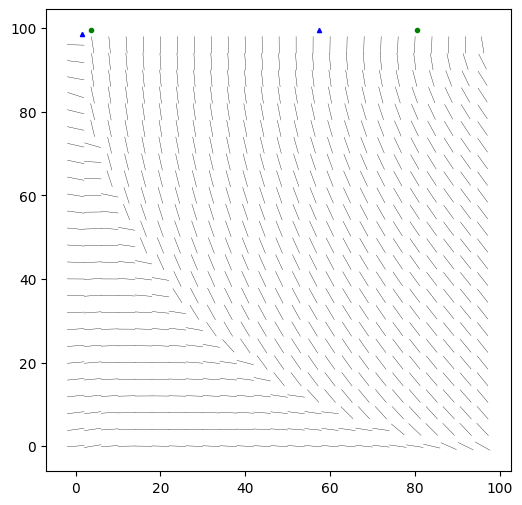

In [55]:
f, s = plt.subplots( figsize=(6,6))
mp.nematic.plot.director(frame, s)
mp.nematic.plot.defects(frame, s)


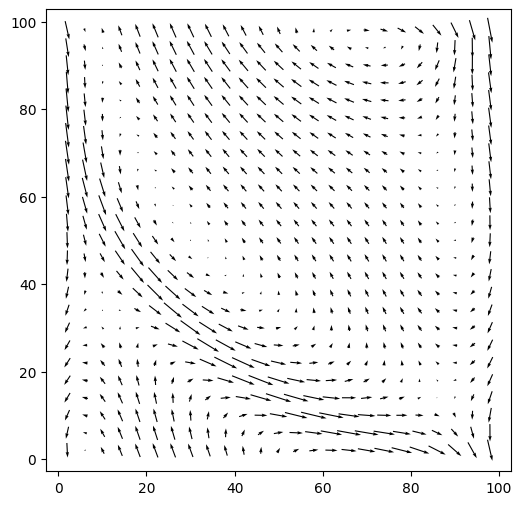

In [57]:
f, s = plt.subplots(figsize = (6,6))
mp.nematic.plot.velocity(frame, s)


In [58]:
def animate(oa, fn, rng=[], inter=200, show=True):
    """Show a frame-by-frame animation.

    Parameters:
    oa -- the output archive
    fn -- the plot function (argument: frame, plot engine)
    rng -- range of the frames to be ploted
    interval -- time between frames (ms)
    """
    # set range
    if len(rng)==0:
        rng = [ 1, oa._nframes+1 ]
    # create the figure
    fig = plt.figure()

    # the local animation function
    def animate_fn(i):
        # we want a fresh figure everytime
        fig.clf()
        # add subplot, aka axis
        #ax = fig.add_subplot(111)
        # load the frame
        frame = oa._read_frame(i)
        # call the global function
        fn(frame, plt)

    anim = ani.FuncAnimation(fig, animate_fn,
                             frames=np.arange(rng[0], rng[1]),
                             interval=inter, blit=False)
    if show==True:
      plt.show()
      return

    return anim


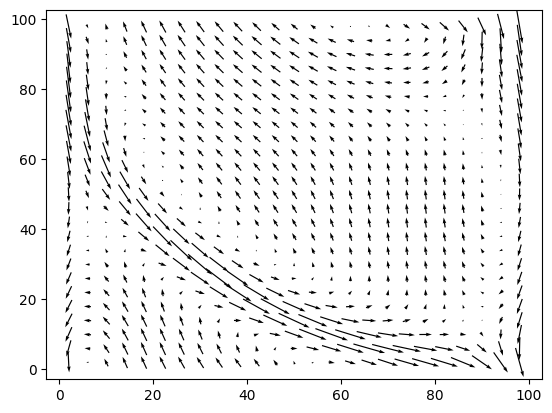

In [59]:
import matplotlib.animation as ani
def plot_flow_field(frame, engine = plt):
    mp.nematic.plot.velocity(frame, engine)

anim = animate(ar, plot_flow_field, rng=[1,10], show = False)

anim.resume()



In [ ]:
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)
print(defects[:5])

[{'charge': -0.5, 'pos': [1.5, 98.5]}, {'charge': 0.5, 'pos': [3.5, 99.5]}, {'charge': -0.5, 'pos': [57.5, 99.5]}, {'charge': 0.5, 'pos': [80.5, 99.5]}]


In [ ]:
nposdef = len([d for d in defects if d['charge']==0.5])
print(nposdef)

2
